# Gradient Symbolic Computation
__(Cho, Goldrick & Smolensky 2016)__

## Data

In what follows I'll try to illustrate how to use GSC to model allomorphy.
In Sanskrit we have some roots which alternate their forms in obedience to some morphophonological constrainsts. In particular, no two aspirates are allowed in the same roots.

The root for 'to be' is inherited as $b^hud^h$ with two voiced aspirates but surfaces either as $b^hud-$ or as $bud^h$.

The problem has attracted the attention of many scholars due to impossibility to model this phenomenon through phonological rules, which would lead to ordering paradoxes (Sag 19xx, K.). Some attempts have been made to postulate complicated underlying representations (Kiparsky xxxx) or OT-constraints.

GSC offers a solution to the long-standing problem of the underlying representation of these roots if we take into account the possibility that both the aspirated and plain variants of the consonants were underlying represented and the UR as whole is a gradient blend of the two segments/or possibly features.

$$b^hud-/bud^h = [\alpha \cdot b^h + \beta \cdot b] \, u \, [\gamma \cdot d + \delta \cdot d^h]$$

In [1]:
# Imports
import torch
# Set seed for reproducibility
# torch.manual_seed(111)

## The TPR Representation

In matrix language the **Tensor Product Representation** of a structure $s$ can be expressed as:

$$T_s = F \times B \times R$$

the chain product of the filler matrix, times the binding matrix times the role matrix.

**Ex**:
Let's suppose we have the input *budh*. This can be decomposed into

$$b \otimes r_1 + u \otimes r_2 + dh \otimes r_3$$

Now suppose that our language also consists of the additional fillers "bh" and "d". The ordered set of fillers could be:

["bh", "b", "u", "d", "dh", "_"]

(the last filler represents the empty filler (I've used it occasionally to pad shorter strings, without onset or coda)

The binding matrix for *budh* would be:


In [2]:
# 3 cols : 3 positions for the roots (initial, middle, final) and 6 rows, one for each filler
budh = torch.tensor([[0., 0., 0.],
                     [1., 0., 0.],
                     [0., 1., 0.],
                     [0., 0., 0.],
                     [0., 0., 1.],
                     [0., 0., 0.]])

The role and the filler matrices can be built in different ways. Here they were build using random components, chosen so that the columns build a set of linearly independent vectors and their pairwise dotproduct is 0 (maximally different).

In [3]:
R = torch.tensor([[ 0.4311,  0.8892, -0.1533],[-0.3264,  0.3121,  0.8922],[ 0.8412, -0.3346,  0.4248]])
F = torch.tensor([[ 0.2958, -0.3054,  0.0164,  0.2841,  0.4751,  0.7159],
        [ 0.1613, -0.2552,  0.7667,  0.1514,  0.3030, -0.4542],
        [ 0.5245,  0.4364,  0.4019,  0.0709, -0.5345,  0.2867],
        [-0.3085,  0.6143,  0.2897, -0.4018,  0.4824,  0.2222],
        [ 0.6668,  0.3079, -0.4022, -0.0627,  0.3952, -0.3724],
        [-0.2674,  0.4232, -0.0681,  0.8520,  0.0888, -0.1045]])

print(f"Roles matrix:\n{R}\n\n")
print(f"Fillers matrix:\n{F}")

Roles matrix:
tensor([[ 0.4311,  0.8892, -0.1533],
        [-0.3264,  0.3121,  0.8922],
        [ 0.8412, -0.3346,  0.4248]])


Fillers matrix:
tensor([[ 0.2958, -0.3054,  0.0164,  0.2841,  0.4751,  0.7159],
        [ 0.1613, -0.2552,  0.7667,  0.1514,  0.3030, -0.4542],
        [ 0.5245,  0.4364,  0.4019,  0.0709, -0.5345,  0.2867],
        [-0.3085,  0.6143,  0.2897, -0.4018,  0.4824,  0.2222],
        [ 0.6668,  0.3079, -0.4022, -0.0627,  0.3952, -0.3724],
        [-0.2674,  0.4232, -0.0681,  0.8520,  0.0888, -0.1045]])


*budh* can be then represented as:

In [4]:
tpr_budh = F.matmul(budh).matmul(R.T)
tpr_budh

tensor([[-0.1899,  0.5287, -0.0606],
        [ 0.5253,  0.5929, -0.3425],
        [ 0.6274, -0.4939,  0.0056],
        [ 0.4485,  0.3203,  0.6247],
        [-0.2855,  0.1266,  0.5615],
        [ 0.1083, -0.0802,  0.4165]])

Notice that even though this representation is now distributed, we can always retrieve (unbind) the original fillers using matrix multiplication:

$$TPR \times R^{-1} = F$$

In [5]:
tpr_budh.matmul(torch.pinverse(R.T))

tensor([[-0.3054,  0.0164,  0.4751],
        [-0.2552,  0.7667,  0.3030],
        [ 0.4364,  0.4019, -0.5345],
        [ 0.6143,  0.2897,  0.4824],
        [ 0.3079, -0.4022,  0.3952],
        [ 0.4232, -0.0681,  0.0888]])

Compare this matrix with the Filler matrix:

In [6]:
F

tensor([[ 0.2958, -0.3054,  0.0164,  0.2841,  0.4751,  0.7159],
        [ 0.1613, -0.2552,  0.7667,  0.1514,  0.3030, -0.4542],
        [ 0.5245,  0.4364,  0.4019,  0.0709, -0.5345,  0.2867],
        [-0.3085,  0.6143,  0.2897, -0.4018,  0.4824,  0.2222],
        [ 0.6668,  0.3079, -0.4022, -0.0627,  0.3952, -0.3724],
        [-0.2674,  0.4232, -0.0681,  0.8520,  0.0888, -0.1045]])

The matrix we obtained by multiplying the TP representation with the inverse of the role matrix is a (6,3) matrix, where each column represent a role (in this example the position of the filler in the string) and the component of each column are exactly those of the second, third and fifth column of the filler matrix, corresponding resp. to the fillers "b", "u" and "dh".

## Blend Representations

The same procedure can be applied if the Binding matrix doesn't contain just 0s and 1s but some values between 0s and 1s, corresponding to partial activations of specific fillers.

So for instance the blend $(0.8 \cdot b + 0.7 \cdot bh)udh$ can be represented with the following binding matrix:

In [7]:
bbhudh = torch.tensor([[.7, 0, 0], [.8, 0, 0], [0,1,0],[0,0,0],[0,0,1],[0,0,0]])
bbhudh

tensor([[0.7000, 0.0000, 0.0000],
        [0.8000, 0.0000, 0.0000],
        [0.0000, 1.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000]])

It's representation in the neural space will then be:

In [8]:
tpr_bbhudh = F @ bbhudh @ R.T
tpr_bbhudh

tensor([[-0.0743,  0.4412,  0.1650],
        [ 0.5960,  0.5394, -0.2046],
        [ 0.7481, -0.5852,  0.2410],
        [ 0.3024,  0.4309,  0.3397],
        [-0.1108, -0.0057,  0.9023],
        [-0.0089,  0.0086,  0.1878]])

The same holds here as before. We can go back to the local representation using the matrix multiplication.

In [9]:
bbhudh_fillers = tpr_bbhudh.matmul(torch.pinverse(R.T))
print(f"bbhudh_fillers :\n{bbhudh_fillers}\n\n")
print(f"Filler Matrix :\n{F}\n")

bbhudh_fillers :
tensor([[-0.0373,  0.0164,  0.4751],
        [-0.0912,  0.7667,  0.3030],
        [ 0.7163,  0.4019, -0.5345],
        [ 0.2755,  0.2897,  0.4824],
        [ 0.7131, -0.4022,  0.3952],
        [ 0.1514, -0.0681,  0.0888]])


Filler Matrix :
tensor([[ 0.2958, -0.3054,  0.0164,  0.2841,  0.4751,  0.7159],
        [ 0.1613, -0.2552,  0.7667,  0.1514,  0.3030, -0.4542],
        [ 0.5245,  0.4364,  0.4019,  0.0709, -0.5345,  0.2867],
        [-0.3085,  0.6143,  0.2897, -0.4018,  0.4824,  0.2222],
        [ 0.6668,  0.3079, -0.4022, -0.0627,  0.3952, -0.3724],
        [-0.2674,  0.4232, -0.0681,  0.8520,  0.0888, -0.1045]])



Notice that nothing changed as for the representation of the second and third position in the string:

In [10]:
assert torch.allclose(F[:,2],bbhudh_fillers[:,1])
assert torch.allclose(F[:,4],bbhudh_fillers[:,2])

But the first column in our representation is now a blend of the first and second column in the filler Matrix. How much of the first and second fillers went into the representation of the first element of the blend representation is revealed using the dot product between those vectors

In [11]:
torch.dot(F[:,0],bbhudh_fillers[:,0])

tensor(0.7000)

In [12]:
torch.dot(F[:,1],bbhudh_fillers[:,0])

tensor(0.8001)

Notice also that the similarity with other fillers is close to 0, which guarantees that we can always unbind the representations.

In [13]:
torch.dot(F[:,2],bbhudh_fillers[:,0])

tensor(-3.8743e-06)

In [14]:
torch.dot(F[:,3],bbhudh_fillers[:,0])

tensor(-4.3511e-05)

In [15]:
torch.dot(F[:,4],bbhudh_fillers[:,0])

tensor(-4.8921e-05)

## Heat map visualization of blends and pure representations

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [17]:
roles = ["pos1", "pos2", "pos3"]
fillers = ["bh", "b", "u", "d", "dh", "_"]

## Discrete structure

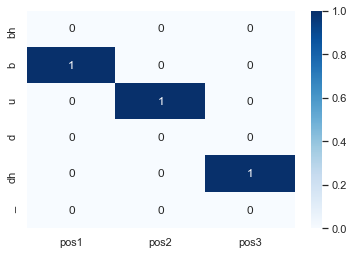

In [18]:
# Purely local representation
budh_heat = sns.heatmap(budh, 
                        cmap="Blues",
                        annot=True, 
                        xticklabels=roles,
                       yticklabels=fillers)

<AxesSubplot:>

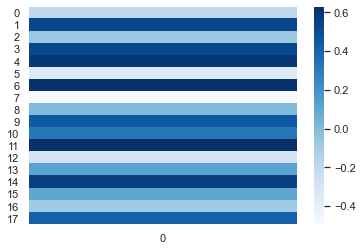

In [19]:
# Distributed representation
sns.heatmap(tpr_budh.reshape((18,1)),
            cmap="Blues")

### Gradient structures

<AxesSubplot:>

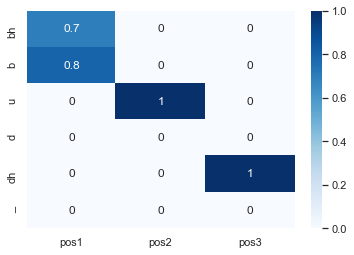

In [20]:
# Blend representation (discrete)
sns.heatmap(bbhudh,
            cmap="Blues",
            annot=True,
            xticklabels=roles,
            yticklabels=fillers)

<AxesSubplot:>

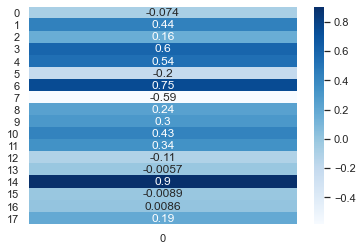

In [21]:
# Blend representation (distributed)
sns.heatmap(tpr_bbhudh.reshape((18,1)),
            cmap="Blues",
            annot=True)